In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [15]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [13]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH','MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6', '#d6d4a0',]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.8392156862745098, 0.8313725490196079, 0.6274509803921569)]

In [73]:
morder

['EXOENZYME', 'OVERFLOW', 'ROS', 'MIXOTROPH', 'MIN']

In [74]:
mmap = {
    'EXOENZYME' : 'E', 
    'EXOENZYME-MIXOTROPH' : 'EM' , 
    'EXOENZYME-ROS' : 'ER',
       'EXOENZYME-ROS-MIXOTROPH' : 'ERM', 
    'MIN' : '-', 
    'MIXOTROPH' : 'M',
    'OVERFLOW' : 'O',
       'OVERFLOW-EXOENZYME' : 'EO',
    'OVERFLOW-EXOENZYME-MIXOTROPH' : 'EOM',
       'OVERFLOW-MIXOTROPH' : 'OM',
    'OVERFLOW-ROS' : 'OR', 
    'OVERFLOW-ROS-EXOENZYME' : 'EOR',
       'OVERFLOW-ROS-MIXOTROPH' : 'ORM', 
    'ROS' : 'R', 
    'ROS-MIXOTROPH' : 'RM',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME' : 'EORM',
}

In [14]:
import os
import glob
dpath = '../results/final/het/'
glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

['../results/final/het/versatile_vpros_monte_add_het_clean.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_ROS.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-ROS-MIXOTROPH.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW.csv',
 '../results/final/het/versatile_vpros_monte_ROS_round2_het.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_MIXOTROPH.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv',
 '../results/final/het/versatile_vpros_monte_het_multi.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_EXOENZYME-MIXOTROPH.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-MIXOTROPH.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_MIN.csv',
 '../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH-OVERFLOW-EXOENZYME.csv',
 '../results/final/het/

In [10]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/final/het/versatile_vpros_monte_add_het_clean.csv add
../results/final/het/versatile_vpros_monte_het_extend_ROS.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-ROS-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW.csv extend
../results/final/het/versatile_vpros_monte_ROS_round2_het.csv round2
../results/final/het/versatile_vpros_monte_het_extend_MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_multi.csv init
../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_MIN.csv extend
../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH-OVERFLOW-EXOENZYME.

In [11]:
vpro_df

,model,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,Phase
0,EXOENZYME,vpro_11_62_EXOENZYME_C1_15,0,0,0.0,0.0,0.0,3,0,3,False,add
1,EXOENZYME,vpro_11_62_EXOENZYME_C1_20,0,1,0.0,0.0,2.0,25,2,25,True,add
2,EXOENZYME,vpro_11_62_EXOENZYME_C1_22,0,0,0.0,0.0,0.0,6,0,6,False,add
3,EXOENZYME,vpro_11_62_EXOENZYME_C1_32,0,2,0.0,0.0,0.0,3,0,3,False,add
4,EXOENZYME,vpro_11_62_EXOENZYME_C1_37,0,6,0.0,0.0,0.0,7,0,7,False,add
...,...,...,...,...,...,...,...,...,...,...,...,...
19741,OVERFLOW-EXOENZYME,vpro_3_9_77_OVERFLOW-EXOENZYME__75_OVERFLOW-EX...,0,5,9.0,0.0,0.0,5,0,5,False,extend
19742,OVERFLOW-EXOENZYME,vpro_3_9_77_OVERFLOW-EXOENZYME__81_OVERFLOW-EX...,0,6,1.0,0.0,7.0,2,7,2,True,extend
19743,OVERFLOW-EXOENZYME,vpro_3_9_77_OVERFLOW-EXOENZYME__91_OVERFLOW-EX...,0,5,0.0,0.0,0.0,15,0,15,False,extend
19744,OVERFLOW-EXOENZYME,vpro_3_9_77_OVERFLOW-EXOENZYME__92_OVERFLOW-EX...,0,3,12.0,0.0,0.0,12,0,12,False,extend


In [18]:
vpro_df['simulations_per_VPRO']  = vpro_df[gorder].sum(axis=1)

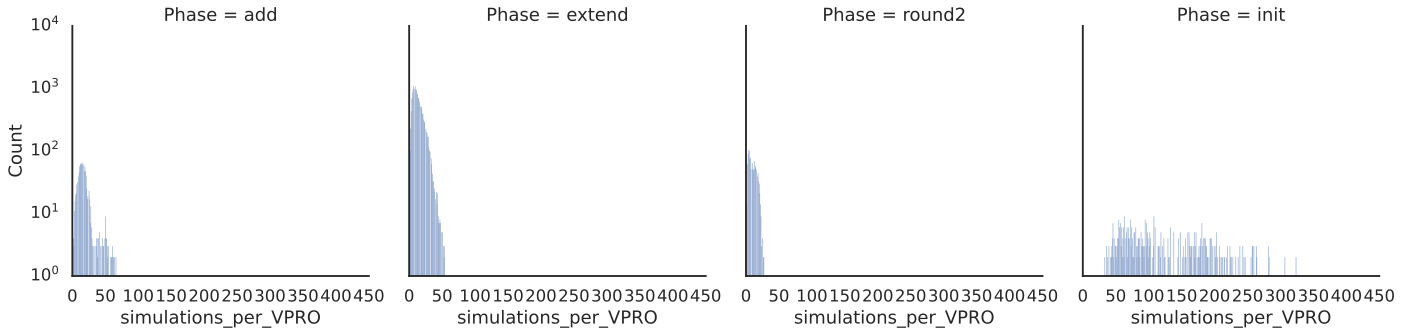

In [45]:
sns.set_context('talk')
sns.displot(
    data=vpro_df,
    col='Phase', 
    x='simulations_per_VPRO',
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False),
).set(yscale='log')

In [34]:
vpro_df.loc[vpro_df.simulations_per_VPRO.le(40)].shape, vpro_df.shape

((18960, 13), (19746, 13))

In [35]:
vpro_df.simulations_per_VPRO.describe()

count    19746.000000
mean        17.169351
std         25.689154
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max        427.000000
Name: simulations_per_VPRO, dtype: float64

In [30]:
vpro_df.groupby(['Phase', ]).size()

Phase
add        1070
extend    16849
init        610
round2     1217
dtype: int64

In [ ]:
vpro_df.groupby('Phase').simulations_per_VPRO.value_counts().head(30)

In [37]:
19746 * 50

987300

In [38]:
vpro_df.simulations_per_VPRO.sum()

339026.0

In [49]:
count_df = vpro_df.groupby(['Phase','model'])[gorder].sum()
count_df

Strong  Sustained  Inhibited  Weak  \
Phase  model                                                                  
add    EXOENZYME                           75.0      959.0          1  1078   
       OVERFLOW                            20.0      271.0         15  3574   
       ROS                               2034.0      100.0          1   609   
extend EXOENZYME                          206.0     2340.0          1  3073   
       EXOENZYME-MIXOTROPH                 23.0      824.0         65  2749   
       EXOENZYME-ROS                      420.0     3047.0          6  3859   
       EXOENZYME-ROS-MIXOTROPH            551.0     2245.0          4  4441   
       MIN                                  0.0        0.0          2  4471   
       MIXOTROPH                            0.0        1.0         11  3994   
       OVERFLOW                            21.0      284.0          3  6882   
       OVERFLOW-EXOENZYME                 147.0     3524.0          3  4049   
       OVERFLOW-EXOENZYME-MIXOTROPH       256.0     3594.0        127  3403   
       OVERFLOW-MIXOTROPH                   6.0      344.0         32  5450   
       OVERFLOW-ROS                       318.0      335.0          6  8342   
       OVERFLOW-ROS-EXOENZYME             665.0     3705.0          3  5540   
       OVERFLOW-ROS-MIXOTROPH             562.0      333.0          7  6246   
       ROS                                118.0        3.0          3  4768   
       ROS-MIXOTROPH                      321.0       33.0         13  4484   
       ROS-MIXOTROPH-OVERFLOW-EXOENZYME   331.0     2751.0          4  7007   
init   EXOENZYME                           35.0     1741.0          1  1011   
       EXOENZYME-MIXOTROPH                  0.0      271.0         49   888   
       EXOENZYME-ROS                      253.0     1290.0          0  1112   
       EXOENZYME-ROS-MIXOTROPH            363.0      972.0          0  1323   
       MIN                                  0.0        0.0          2  1500   
       MIXOTROPH                            0.0        0.0          0  1335   
       OVERFLOW                             5.0      182.0         14  1852   
       OVERFLOW-EXOENZYME                  86.0     2296.0          1  1254   
       OVERFLOW-EXOENZYME-MIXOTROPH       167.0     1812.0         89  1208   
       OVERFLOW-MIXOTROPH                   5.0      246.0          6  2003   
       OVERFLOW-ROS                       104.0      249.0          3  2672   
       OVERFLOW-ROS-EXOENZYME             410.0     1552.0          0  1584   
       OVERFLOW-ROS-MIXOTROPH             476.0      139.0          1  1863   
       ROS                                190.0       11.0          1  1561   
       ROS-MIXOTROPH                      446.0        9.0          0  1367   
       ROS-MIXOTROPH-OVERFLOW-EXOENZYME   281.0     1062.0          2  2269   
round2 ROS                               3321.0      129.0          7  1975   

                                         Neutral   Other  
Phase  model                                              
add    EXOENZYME                            2420   795.0  
       OVERFLOW                             4427   360.0  
       ROS                                   279  2301.0  
extend EXOENZYME                            7271  1950.0  
       EXOENZYME-MIXOTROPH                  7168  1095.0  
       EXOENZYME-ROS                        6065  2671.0  
       EXOENZYME-ROS-MIXOTROPH              4673  2284.0  
       MIN                                  1848     0.0  
       MIXOTROPH                            2785    41.0  
       OVERFLOW                             6205   459.0  
       OVERFLOW-EXOENZYME                  11140  2335.0  
       OVERFLOW-EXOENZYME-MIXOTROPH        10395  2379.0  
       OVERFLOW-MIXOTROPH                   8341   476.0  
       OVERFLOW-ROS                         4029  1457.0  
       OVERFLOW-ROS-EXOENZYME               8310  3706.0  
       OVERFLOW-ROS-MIXOTROPH      

In [50]:
mcount_df = count_df.reset_index().melt(id_vars=['model', 'Phase'], value_name='simulations', var_name='y_pred')
mcount_df

,model,Phase,y_pred,simulations
0,EXOENZYME,add,Strong,75.0
1,OVERFLOW,add,Strong,20.0
2,ROS,add,Strong,2034.0
3,EXOENZYME,extend,Strong,206.0
4,EXOENZYME-MIXOTROPH,extend,Strong,23.0
...,...,...,...,...
211,OVERFLOW-ROS-MIXOTROPH,init,Other,515.0
212,ROS,init,Other,172.0
213,ROS-MIXOTROPH,init,Other,289.0
214,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,Other,1023.0


In [58]:
count_df

Strong  Sustained  Inhibited  Weak  \
Phase  model                                                                  
add    EXOENZYME                           75.0      959.0          1  1078   
       OVERFLOW                            20.0      271.0         15  3574   
       ROS                               2034.0      100.0          1   609   
extend EXOENZYME                          206.0     2340.0          1  3073   
       EXOENZYME-MIXOTROPH                 23.0      824.0         65  2749   
       EXOENZYME-ROS                      420.0     3047.0          6  3859   
       EXOENZYME-ROS-MIXOTROPH            551.0     2245.0          4  4441   
       MIN                                  0.0        0.0          2  4471   
       MIXOTROPH                            0.0        1.0         11  3994   
       OVERFLOW                            21.0      284.0          3  6882   
       OVERFLOW-EXOENZYME                 147.0     3524.0          3  4049   
       OVERFLOW-EXOENZYME-MIXOTROPH       256.0     3594.0        127  3403   
       OVERFLOW-MIXOTROPH                   6.0      344.0         32  5450   
       OVERFLOW-ROS                       318.0      335.0          6  8342   
       OVERFLOW-ROS-EXOENZYME             665.0     3705.0          3  5540   
       OVERFLOW-ROS-MIXOTROPH             562.0      333.0          7  6246   
       ROS                                118.0        3.0          3  4768   
       ROS-MIXOTROPH                      321.0       33.0         13  4484   
       ROS-MIXOTROPH-OVERFLOW-EXOENZYME   331.0     2751.0          4  7007   
init   EXOENZYME                           35.0     1741.0          1  1011   
       EXOENZYME-MIXOTROPH                  0.0      271.0         49   888   
       EXOENZYME-ROS                      253.0     1290.0          0  1112   
       EXOENZYME-ROS-MIXOTROPH            363.0      972.0          0  1323   
       MIN                                  0.0        0.0          2  1500   
       MIXOTROPH                            0.0        0.0          0  1335   
       OVERFLOW                             5.0      182.0         14  1852   
       OVERFLOW-EXOENZYME                  86.0     2296.0          1  1254   
       OVERFLOW-EXOENZYME-MIXOTROPH       167.0     1812.0         89  1208   
       OVERFLOW-MIXOTROPH                   5.0      246.0          6  2003   
       OVERFLOW-ROS                       104.0      249.0          3  2672   
       OVERFLOW-ROS-EXOENZYME             410.0     1552.0          0  1584   
       OVERFLOW-ROS-MIXOTROPH             476.0      139.0          1  1863   
       ROS                                190.0       11.0          1  1561   
       ROS-MIXOTROPH                      446.0        9.0          0  1367   
       ROS-MIXOTROPH-OVERFLOW-EXOENZYME   281.0     1062.0          2  2269   
round2 ROS                               3321.0      129.0          7  1975   

                                         Neutral   Other  
Phase  model                                              
add    EXOENZYME                            2420   795.0  
       OVERFLOW                             4427   360.0  
       ROS                                   279  2301.0  
extend EXOENZYME                            7271  1950.0  
       EXOENZYME-MIXOTROPH                  7168  1095.0  
       EXOENZYME-ROS                        6065  2671.0  
       EXOENZYME-ROS-MIXOTROPH              4673  2284.0  
       MIN                                  1848     0.0  
       MIXOTROPH                            2785    41.0  
       OVERFLOW                             6205   459.0  
       OVERFLOW-EXOENZYME                  11140  2335.0  
       OVERFLOW-EXOENZYME-MIXOTROPH        10395  2379.0  
       OVERFLOW-MIXOTROPH                   8341   476.0  
       OVERFLOW-ROS                         4029  1457.0  
       OVERFLOW-ROS-EXOENZYME               8310  3706.0  
       OVERFLOW-ROS-MIXOTROPH      

In [71]:
count_df.model.unique()

array(['EXOENZYME', 'EXOENZYME-MIXOTROPH', 'EXOENZYME-ROS',
       'EXOENZYME-ROS-MIXOTROPH', 'MIN', 'MIXOTROPH', 'OVERFLOW',
       'OVERFLOW-EXOENZYME', 'OVERFLOW-EXOENZYME-MIXOTROPH',
       'OVERFLOW-MIXOTROPH', 'OVERFLOW-ROS', 'OVERFLOW-ROS-EXOENZYME',
       'OVERFLOW-ROS-MIXOTROPH', 'ROS', 'ROS-MIXOTROPH',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME'], dtype=object)

In [75]:
count_df = vpro_df.groupby(['model'])[gorder].sum().reset_index()
count_df['MODEL'] = count_df.model.map(mmap)
for m in morder:
    count_df[m] = count_df.model.str.contains(m)
count_df

count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN
0,EXOENZYME,316.0,5040.0,3,5162,12314,3647.0,E,True,False,False,False,False
1,EXOENZYME-MIXOTROPH,23.0,1095.0,114,3637,9467,1604.0,EM,True,False,False,True,False
2,EXOENZYME-ROS,673.0,4337.0,6,4971,8392,3608.0,ER,True,False,True,False,False
3,EXOENZYME-ROS-MIXOTROPH,914.0,3217.0,4,5764,6329,3141.0,ERM,True,False,True,True,False
4,MIN,0.0,0.0,4,5971,2471,0.0,-,False,False,False,False,True
5,MIXOTROPH,0.0,1.0,11,5329,3843,41.0,M,False,False,False,True,False
6,OVERFLOW,46.0,737.0,32,12308,13288,1011.0,O,False,True,False,False,False
7,OVERFLOW-EXOENZYME,233.0,5820.0,4,5303,14661,3178.0,EO,True,True,False,False,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,423.0,5406.0,216,4611,13343,3361.0,EOM,True,True,False,True,False
9,OVERFLOW-MIXOTROPH,11.0,590.0,38,7453,11293,691.0,OM,False,True,False,True,False


In [89]:
count_df[[m1,m2]].any(axis=1)

0     False
1      True
2     False
3      True
4     False
5      True
6     False
7     False
8      True
9      True
10    False
11    False
12     True
13    False
14     True
15     True
dtype: bool

In [99]:
tmpdf[gorder].T.squeeze()

Strong         316.0
Sustained     5040.0
Inhibited        3.0
Weak          5162.0
Neutral      12314.0
Other         3647.0
Name: E, dtype: float64

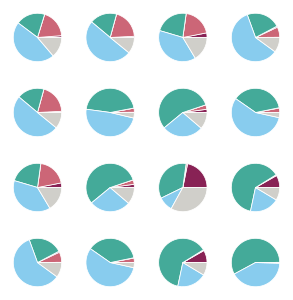

In [105]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder if m not in [m1, m2]]
        tmpdf =count_df.loc[count_df[m1] & count_df[m2] & ~count_df[othercols].any(axis=1) ]
        tmpdf.index = tmpdf.MODEL
        t=tmpdf[gorder].T.squeeze()
        #_wedges, labels, percentages = 
        axes[i1,i2].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                                       #labels=t.index, autopct='%1.1f%%', 
              )
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


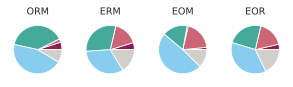

In [111]:
sns.set_context('paper')
fig, axes = plt.subplots(1,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    #for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder[:-1] if m not in [m1]]
        tmpdf =count_df.loc[~count_df[m1] & count_df[othercols].all(axis=1) ]
        tmpdf.index = tmpdf.MODEL
        #print(tmpdf)
        t=tmpdf[gorder].T.squeeze()
    
        #_wedges, labels, percentages = 
        axes[i1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                                       #labels=t.index, autopct='%1.1f%%', 
              )
        axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


[Text(0.5, 1.0, '-')]

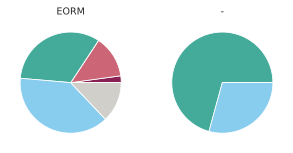

In [113]:
sns.set_context('paper')
fig, axes = plt.subplots(1,2, figsize=(5,5))# , sharex=True)# , sharey=True)
tmpdf =count_df.loc[count_df[morder[:-1]].all(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[0].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
   #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[0].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


tmpdf =count_df.loc[~count_df[morder[:-1]].any(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
   #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[1].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


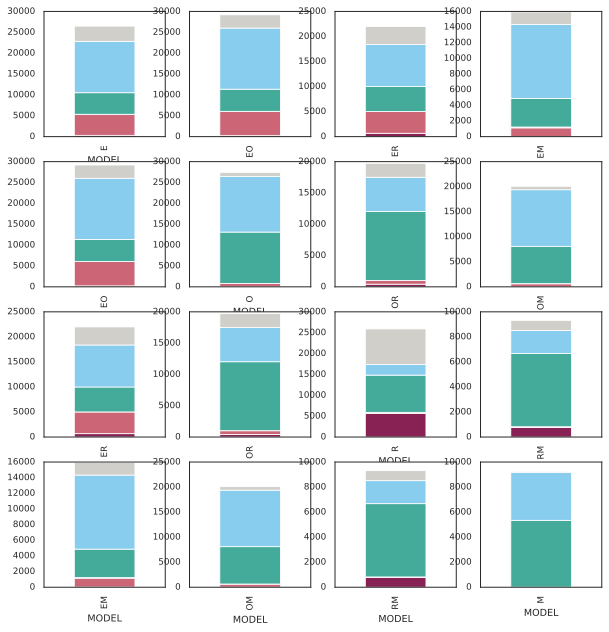

In [93]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(10,10))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder if m not in [m1, m2]]
        tmpdf =count_df.loc[count_df[m1] & count_df[m2] & ~count_df[othercols].any(axis=1) ]
        tmpdf.index = tmpdf.MODEL
        tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


<Axes: ylabel='model'>

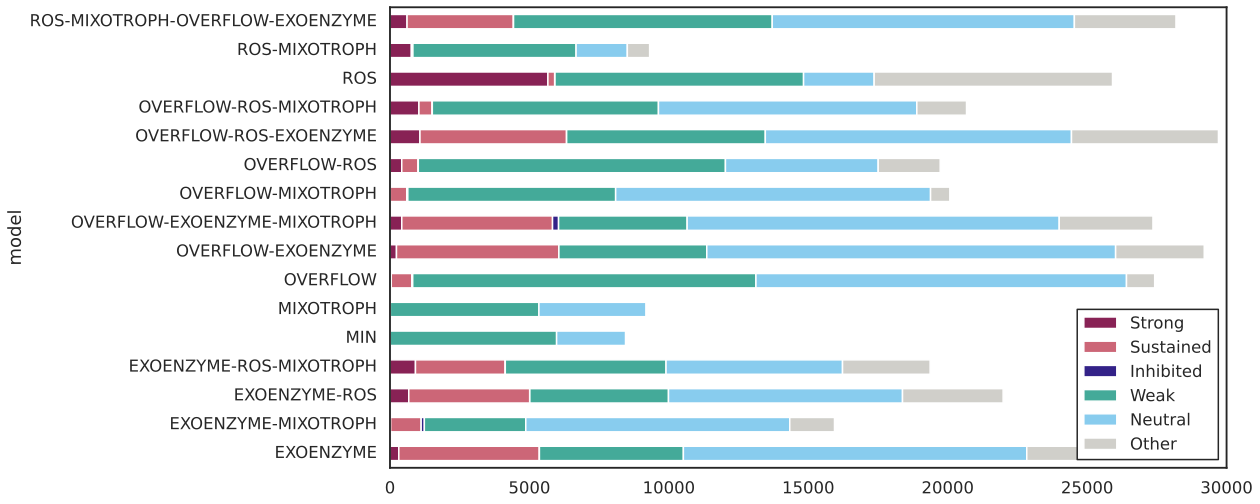

In [67]:
count_df = vpro_df.groupby(['model'])[gorder].sum()
count_df.plot(kind='barh', stacked=True, color=gpalette)


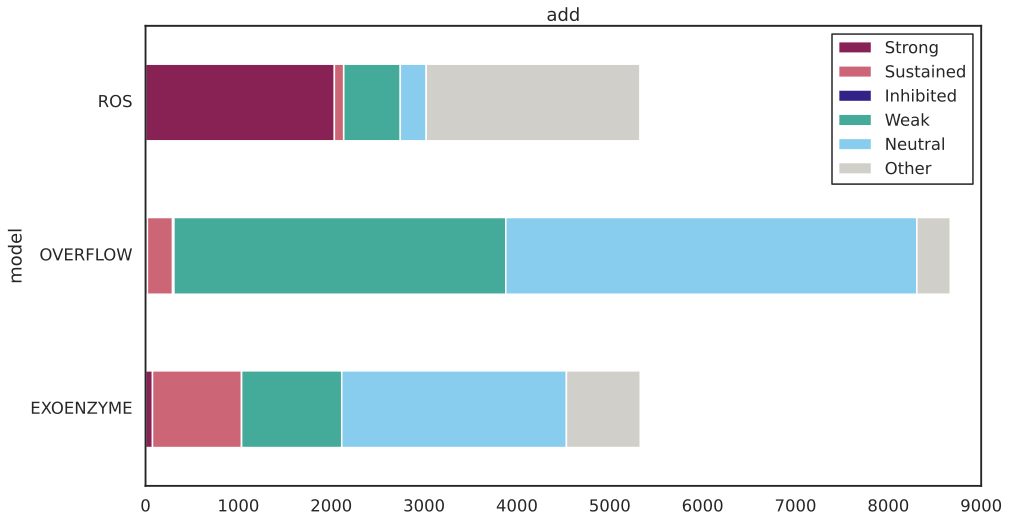

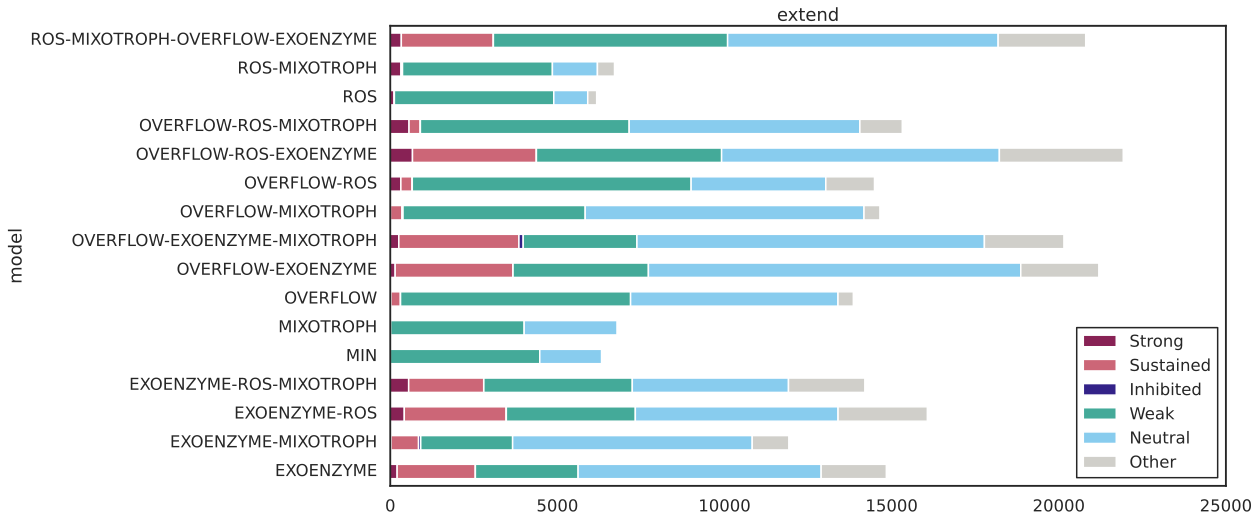

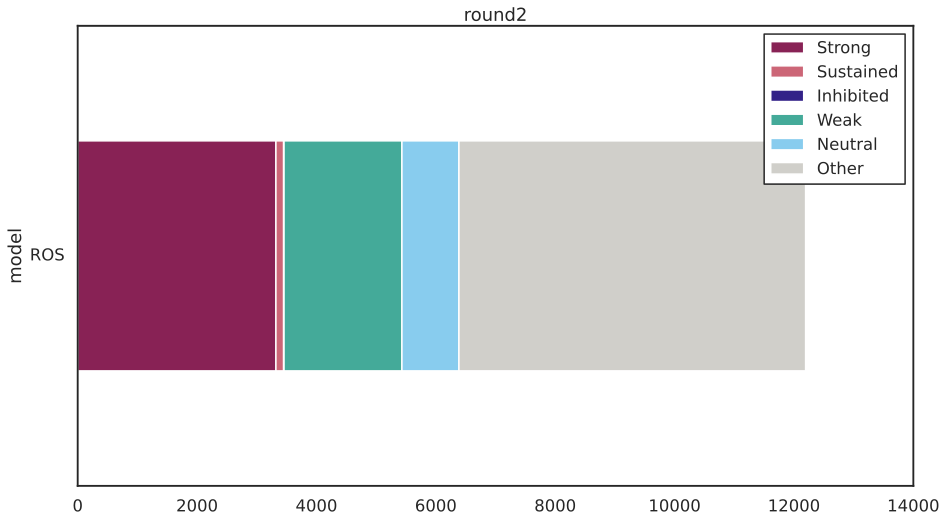

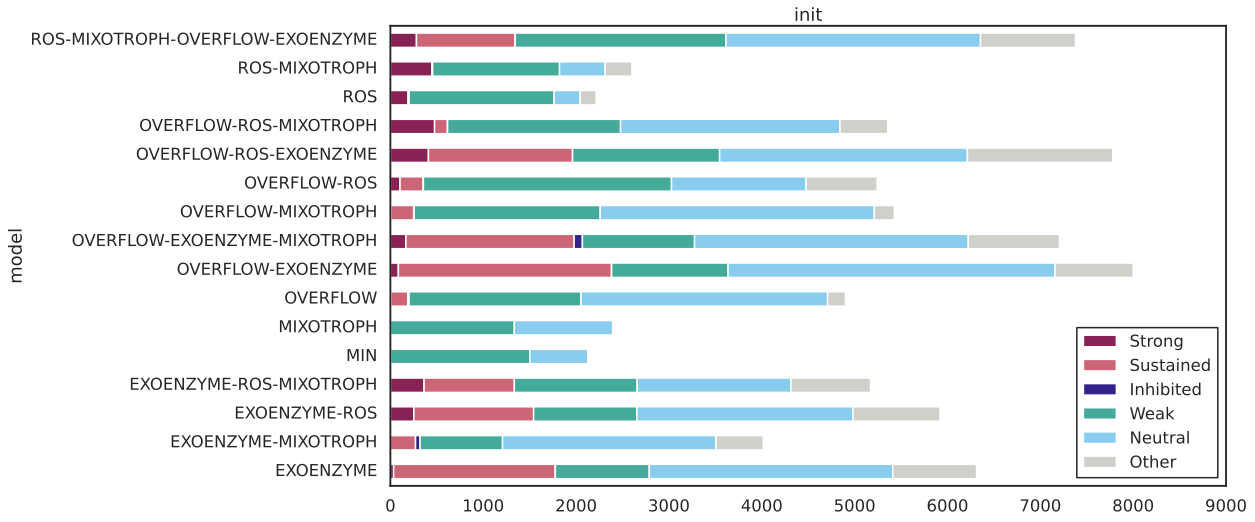

In [66]:
for i in vpro_df.Phase.unique():
    count_df = vpro_df.loc[vpro_df.Phase.isin([i])].groupby(['model'])[gorder].sum()

    count_df.plot(kind='barh', stacked=True, color=gpalette)
    plt.title(i)

In [ ]:
for m in morder:
    fig, ax = plt.subplots()

    _wedges, labels, percentages = ax.pie(pdf.T[m], labels=pdf.columns, autopct='%1.1f%%', colors=gpalette,
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
          )
    for label, percentage in zip(labels, percentages):
        if percentage.get_text() == '0.0%':
            percentage.remove()
            label.remove()
        else:
            if m in ['OVERFLOW'] and label.get_text() in ['Sustained', 'Strong', 'Other', 'Inhibited']:
                label.set_text(label.get_text() + ', ' + percentage.get_text())
            else:
                label.set_text(label.get_text() + '\n' + percentage.get_text())
            percentage.remove()
    plt.title(m)
    plt.tight_layout()
    plt.show()